# Statistical Power - Lab

## Introduction


In this lesson, we will consider a general-purpose simulation approach to estimating the power of an experimental design. Power analysis is an important aspect of experimental design. It allows us to determine the sample size required to detect an effect of a given size with a given degree of confidence. In other words, it allows us to determine the probability of detecting an effect of a given size with a given level of confidence, under sample size constraints. If this probability is unacceptably low, we would be wise to alter or abandon the experiment.

The following four factors have an intimate relationship:

* Sample size
* Effect size
* Significance level = P (Type I error) = probability of finding an effect that is not there
* **Power = 1 - P (Type II error)** = probability of finding an effect that is there

Given any three of these, we can easily determine the fourth.

## Objectives

You will be able to:

* Describe the concept of “Power” in relation to p-value and effect size for hypothesis testing
* Understand and critically evaluate the factors influencing the power of an experiment
* Perform Power calculation using SciPy and Python
* Demonstrate the impact of sample size on statistical power using simulations
* Demonstrate the combined effect of sample size and effect size on statistical power using simulations  

## Let's get started!
  
To start, let's import the necessary libraries required for this simuation:

In [1]:
import numpy as np
import scipy.stats as stats
import pandas
import matplotlib.pyplot as plt

## Scenario

A researcher wants to study how daily protein supplementation in the elderly population will affect baseline liver fat. The study budget will allow enrollment of 24 patients. Half will be randomized to a placebo group and half to the protein supplement treatment group and the trial will be carried out over one month. It is desired to see whether the mean change in percentage of liver fat from baseline to the end of the study differs between the two groups in the study. 

So we have the null hypothesis 

**There is no difference between experimental and control means i.e. H0 is equal to H1**

And the alternative Hypothesis

**There is a difference between experimental and control means i.e. H0 is not equal to H1**

The researcher needs to know what power  will be obtained under the sample size restrictions to identify a change in mean percent liver fat of 0.17. Based on past results, a common standard deviation of 0.21 will be used for each treatment group in the power analysis. 

We will run a simulation with above information to calculate the power expected from the given sample size. From above we have following data to work with. 

In [2]:
# Number of patients in each group
sample_size = 12

# Control group
control_mean = 0
control_sd = .21

# Experimental group
experimental_mean = .17
experimental_sd = .21

#Set the number of simulations for our test = 1000
n_sim = 1000

We can now start running our simulations to run an independance t-test with above data and store the calculated p_value in our `p` array. Perform following tasks.

* Initialize a numpy array and fill it with Nan values for storing the results (p_value) of our independance T-test.
* For defined number of simulations (i.e. 1000), do the following:

    * Generate a random normal variable with control mean and sd
    * Generate a random normal variable with experimental mean and sd
    * Run and independant t-test using control and experimental data
    * Store the p value for each test

* Calculate the total number and overall proportion of simulations and where Null hypothesis is rejected


In [3]:
# For reproducability 
np.random.seed(10)

# Initialize array to store results
p = (np.empty(n_sim))
p.fill(np.nan)

#  Run a for loop for range of values in n_sim
for n in range(n_sim):
    control = np.random.normal(size=sample_size, loc=control_mean, scale=control_sd)
    exper = np.random.normal(loc=experimental_mean, scale=experimental_sd, size=sample_size)
    t_test = stats.ttest_ind(control, exper)
    p[n] = t_test[1]
# number of null hypothesis rejections
num_null_rejects = np.sum(p<.05)
reject_proportion = num_null_rejects/float(n_sim)

reject_proportion

# 0.495

0.495

Our results tell us that using 12 participants in each group and with given statistics, the power we obtain is 49% for our test settings. This can be interpreted as follows:

> **If a large effect is truly present between control and experimental groups, then the null hypothesis (i.e. no difference with alpha 0.05) would be rejected 49% of times. **

## Sample size requirements for a given effect size

The researcher conducting this experiment is not satisfied with the results of power calculations shown above, and would like to work out what sample size is required in order to be able to reject the null hypothesis 95% of times that an effect size of 0.17 exists between control and experimental group means. (as compared to 49% with current sample size). 

To achieve this, we shall move on to a more common scenario, where a design and effect size is decided and we would like to know what sample size is needed to achieve a particular power. This is a straightforward extension of the previous example: we begin with a current sample size and calculate the associated power. We then perform such a calculation repeatedly, each time increasing the sample size, until the power has reached the desired level.

Let's define our experimental parameters. 

In [4]:
# required power 0.95
target = .95

We will also need to define the number of simulations and a `current` variable for an iterative comparison with target power defined. We shall start with a sample size of 12 (current) and keep increasing it until the required power is achieved. We shall also increase the number of simulations to 10,000 for a more deterministic output. 

In [5]:
# minimum sample size to start the simulations 
sample_size = 12
current = 0
n_sim = 10000

As above, perform the following

* Initialize an empty array for storing results
* initiliaze a list for storing samplesize x power summary
* While current power is less than target power
    * Generate distributions for control and experimental groups using given statistics (as before)
    * Run a t-test and store results
    * Calculate current power 
    * Output current sample size and power calculated for inspection
    * Store results: Sample size , power
    * increase the sample size by 1 and repeat

In [6]:
np.random.seed(10)

p = (np.empty(n_sim))
p.fill(np.nan)

power_sample = []
while current < target:
    data = np.empty([n_sim, sample_size, 2])
    data.fill(np.nan)
# keep iterating as shown above until desired power is obtained
    data[:,:,0] = np.random.normal(loc=control_mean, scale=control_sd, size=[n_sim, sample_size])
    data[:,:,1] = np.random.normal(loc=experimental_mean, scale=experimental_sd, size=[n_sim, sample_size])            

    result = stats.ttest_ind(data[:, :, 0],data[:, :, 1],axis=1)
    p= result[1]
    
    rejects = np.sum(p<.05)
    
    reject_proportion = rejects/float(n_sim)
    current = reject_proportion
    
    print(f'Num Samples: {sample_size}, Power: {current}')
    power_sample.append([sample_size, current])
    
    sample_size += 1

Num Samples: 12, Power: 0.4754
Num Samples: 13, Power: 0.5066
Num Samples: 14, Power: 0.5423
Num Samples: 15, Power: 0.5767
Num Samples: 16, Power: 0.6038
Num Samples: 17, Power: 0.6297
Num Samples: 18, Power: 0.658
Num Samples: 19, Power: 0.6783
Num Samples: 20, Power: 0.7056
Num Samples: 21, Power: 0.7266
Num Samples: 22, Power: 0.7481
Num Samples: 23, Power: 0.7624
Num Samples: 24, Power: 0.7864
Num Samples: 25, Power: 0.8031
Num Samples: 26, Power: 0.8178
Num Samples: 27, Power: 0.8354
Num Samples: 28, Power: 0.8405
Num Samples: 29, Power: 0.8568
Num Samples: 30, Power: 0.8736
Num Samples: 31, Power: 0.8786
Num Samples: 32, Power: 0.89
Num Samples: 33, Power: 0.8975
Num Samples: 34, Power: 0.9077
Num Samples: 35, Power: 0.9146
Num Samples: 36, Power: 0.9188
Num Samples: 37, Power: 0.9292
Num Samples: 38, Power: 0.9369
Num Samples: 39, Power: 0.9369
Num Samples: 40, Power: 0.9482
Num Samples: 41, Power: 0.9521


In [7]:
rejects

9521

In [8]:
reject_proportion

0.9521

In [9]:
current

0.9521

In [10]:
target

0.95

We can also plot calculated power against sample size to visually inspect the effect of increasing sample size. 

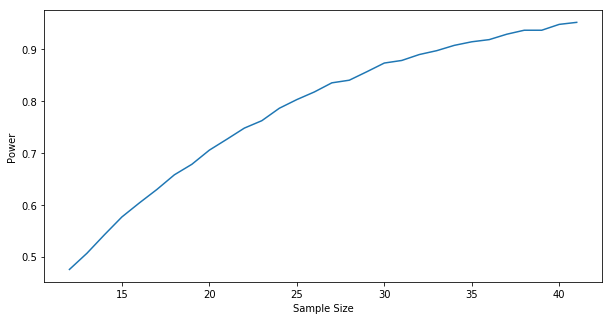

In [13]:
# Plot a sample size X Power line graph 

from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

plt.figure()
plt.xlabel('Sample Size')
plt.ylabel('Power')

ps = power_sample
df = pandas.DataFrame(ps, index=None)
plt.plot(df[0], df[1])
plt.show()

Above output tells us that for our researcher, in order to get the required power (95%) for the observed effect of 0.17 , he would need considerably higher number of patients in each group i.e. 41. 

>**BONUS EXERCISE: Calculating power across varying sample and effect sizes**

>In the previous examples, we have assumed a fixed effect size. However, perhaps we want to investigate how power changes with both effect size and sample size. This is again a straightforward extension of the previous example. 

>1. Generate samples with sizes ranging from 10 to 50 per group
2. Set effect size from less than small (i.e. 0.1) to slightly bigger than large (0.8)
3. set number of simulations to 10000
4. Use nested For loop i.e. for all chosen effect sizes,for all chosen sample sizes, for all groups (i.e. 2) - run the 2 sample independant test and store power, chosen sample size and effect size
5. Visualize your data in a meaningful way to communicate results 

## Summary

In this lesson, we recieved an understanding around the idea of "statistical power" and how sample size, p_value and effect size impact the power of an experiment. We ran a simulation to determine the sample size that would provide a given value of power. In the second simulation, we saw the combined effect of sample size and effect size on the power. We can conclude this lesson with the ideas that a) Statistical power increases as we increase the sample size and b) with a small effect size, we require a large number of samples to achieve required power and vice versa. 